In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

Epoch 1/10
235/235 [==============================] - 5s 16ms/step - loss: 0.2131 - val_loss: 0.1411
Epoch 2/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1283 - val_loss: 0.1164
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1105 - val_loss: 0.1035
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1015 - val_loss: 0.0987
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0963 - val_loss: 0.0955
Epoch 6/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0930 - val_loss: 0.0921
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0906 - val_loss: 0.0886
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0888 - val_loss: 0.0877
Epoch 9/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0871 - val_loss: 0.0862
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


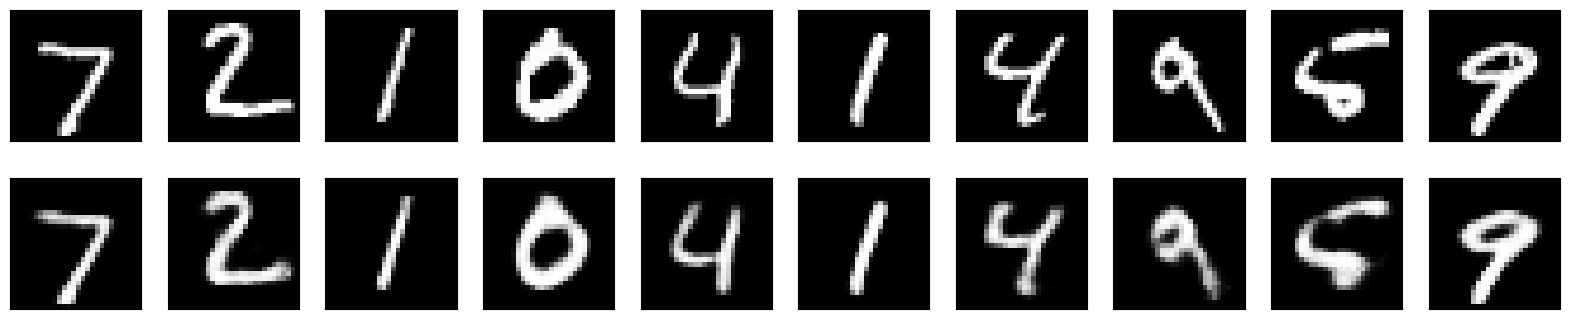

In [ ]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Flatten()(input_img)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
                 epochs=10,
                 batch_size=256,
                 shuffle=True,
                 validation_data=(x_test, x_test))


encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display some results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## L2 Regularization

In [ ]:
from keras.regularizers import l2

Epoch 1/10
235/235 [==============================] - 5s 16ms/step - loss: 0.2318 - val_loss: 0.1600
Epoch 2/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1448 - val_loss: 0.1320
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1277 - val_loss: 0.1206
Epoch 4/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1182 - val_loss: 0.1145
Epoch 5/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1133 - val_loss: 0.1103
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1094 - val_loss: 0.1079
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1064 - val_loss: 0.1045
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1039 - val_loss: 0.1020
Epoch 9/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1020 - val_loss: 0.1005
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


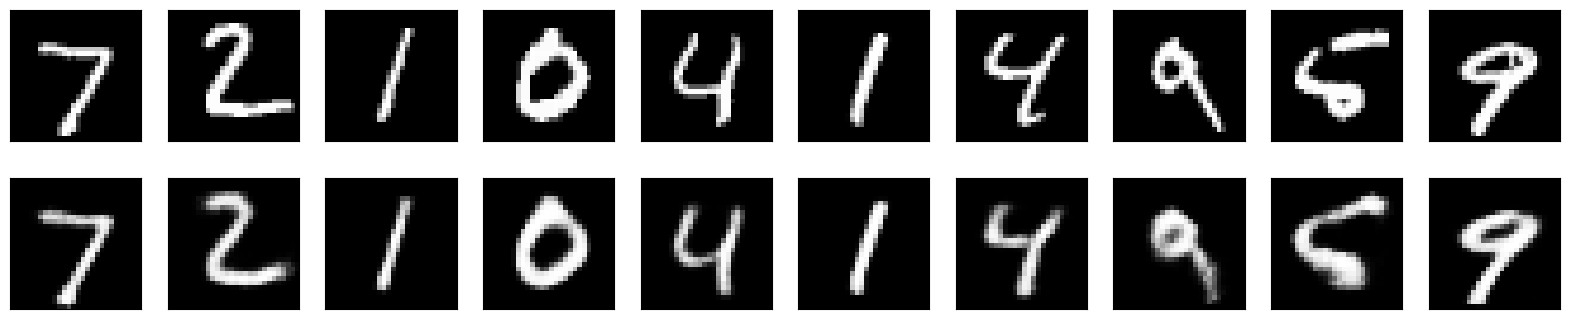

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define L2 regularization strength
l2_reg = tf.keras.regularizers.l2(0.00001)

# Sequential Autoencoder Model
autoencoder = Sequential()

# Encoder
autoencoder.add(Flatten(input_shape=(28, 28, 1)))
autoencoder.add(Dense(512, activation='relu', kernel_regularizer=l2_reg))
autoencoder.add(Dense(256, activation='relu', kernel_regularizer=l2_reg))
autoencoder.add(Dense(128, activation='relu', kernel_regularizer=l2_reg))
autoencoder.add(Dense(64, activation='relu', kernel_regularizer=l2_reg))  # Encoded layer

# Decoder
autoencoder.add(Dense(128, activation='relu', kernel_regularizer=l2_reg))
autoencoder.add(Dense(256, activation='relu', kernel_regularizer=l2_reg))
autoencoder.add(Dense(512, activation='relu', kernel_regularizer=l2_reg))
autoencoder.add(Dense(28 * 28, activation='sigmoid'))
autoencoder.add(Reshape((28, 28, 1)))

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict encoded and decoded images
decoded_imgs = autoencoder.predict(x_test)

# Display some results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Latent Space

313/313 [==============================] - 1s 2ms/step


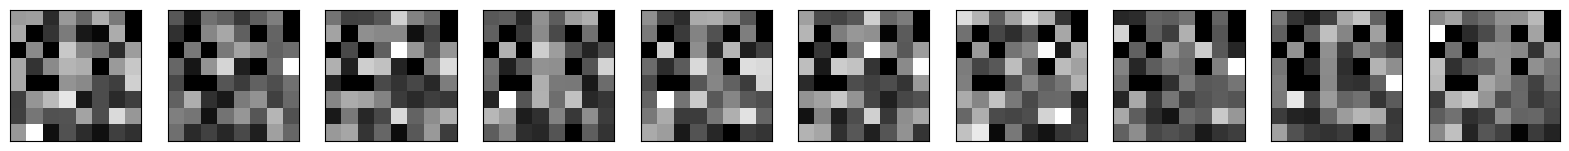

In [ ]:
encoder = tf.keras.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=4).output)

# Encode the test data
encoded_imgs = encoder.predict(x_test)
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(8,8), cmap="gray")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()